<a href="https://colab.research.google.com/github/Ram2437/Projects/blob/master/EDA_Project_Movies_Actual_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

## Table of Contents

1. [Problem Statement](#section1)
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)
   - 3.1 [Understanding the Dataset](#section301)<br/>
   - 3.2 [Pandas Pre-Profiling](#section302)<br/>
   - 3.3 [Pre-Processig](#section303)<br/>
   - 3.4 [Pandas Post-Processig](#section304)<br/>
4. [Questions](#section4)
   - 4.1 [Movies released over the years](#section401)<br/>
   - 4.2 [Movies count based on Genre](#section402)<br/>
   - 4.3 [Count of top 5 movies based on Genre](#section403)<br/>
   - 4.4 [Finding corelation between the numerical columns](#section404)<br/>
   - 4.5 [Relationship between votes and Revenue](#section405)<br/>
   - 4.6 [Relation between  votes and Rating of top 250 movies](#section406)<br/>
   - 4.7 [Relation between user votes and Runtime](#section407)<br/>
   - 4.8 [Rating Vs Runtime](#section408)<br/>
   - 4.9 [Relationship of Votes w.r.t Rating, Revenue, Runtime and Metascore](#section409)<br/>
   - 4.10 [Relationship between Metascore and Rating](#section410)<br/>
   - 4.11 [Hypothesis: On what parameters a movie has to be selected in IMDB top list ? ](#section411)<br/>
5. [Conclusions](#section5)<br/>

### 1. Problem Statement <a id="section1"></a>

The notebooks explores the basic use of __Pandas__ and will cover the basic commands of __Exploratory Data Analysis(EDA)__ which includes __cleaning__, __munging__, __combining__, __reshaping__, __slicing__, __dicing__, and __transforming data__ for analysis purpose.

* __Exploratory Data Analysis__ <br/>
Understand the data by EDA and derive simple models with Pandas as baseline.
EDA ia a critical and first step in analyzing the data and we do this for below reasons :
    - Finding patterns in Data
    - Determining relationships in Data
    - Checking of assumptions
    - Preliminary selection of appropriate models
    - Detection of mistakes

### 2. Data Loading and Description <a id="section2"></a>

- The dataset consists of the information about IMDB top 1000 movies list. Variables like Rank, Genre, Directors, Actors, Year, Rating, Votes, Metascore etc 
- The dataset comprises of __1000 observations of 12 columns__. Below is a table showing names of all the columns and their description.

Column Name:        |                        Description:                             |
--------------      |                        ---------------------                    |
Rank                |                        The Rank of the movie                    | 
Title               |                        Title of the Movie                       | 
Genre               |                        Category of the Movie                    |
Description         |                        In short description of the Movie        | 
Director            |                        Director of the Movie                    | 
Actors              |                        Actors of the movie                      |
Year                |                        Year of the movie released               |
Runtime (Minutes)   |                        Duration of the Movie in minutes         |
Rating              |                        Number of users who have rated the movie |
Votes               |                        Number of users who have rated the movie |
Revenue (Millions)  |                        Revenue collected by the movie in Millions|
Metascore           |                        Based on critic reviews provided by Metacritic.com|

__Backgroud information in short__

__IMDb__ (Internet Movie Database) is an online database of __information related to films__, television programs, home videos and video games, and internet streams, including cast, production crew and personnel biographies, plot summaries, trivia, and __fan reviews and ratings__. An additional fan feature, message boards, was abandoned in February 2017. Originally a fan-operated website, the database is owned and operated by IMDb.com, Inc., a subsidiary of Amazon.

As of October 2018, __IMDb has approximately 5.3 million titles (including episodes) and 9.3 million personalities in its database. as well as 83 million registered users.__

#### Importing Packages

In [0]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
import pandas_profiling

#### Importing a dataset

In [0]:
IMDb_List = pd.read_csv("https://github.com/insaid2018/Term-1/blob/master/Data/Projects/1000%20movies%20data.csv?raw=True")     # Importing training dataset using pd.read_csv
IMDb_List.head(2)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0


### 3. Data Profiling <a id="section3"></a>

- In the upcoming sections we will first __understand our dataset__ using various pandas functionalities.
- Then with the help of __pandas profiling__ we will find which columns of our dataset need preprocessing.
- In __preprocessing__ we will deal with erronous and missing values of columns. 
- Again we will do __pandas profiling__ to see how preprocessing have transformed our dataset.

### 3.1 Understanding the Dataset <a id="section301"></a>

To gain insights from data we must look into each aspect of it very carefully. We will start with observing few rows and columns of data both from the starting and from the end


In [0]:
IMDb_List.shape              # shape prints the total number of rows and columns in the data set

(1000, 12)

In [0]:
IMDb_List.columns            # .column prints the list of collumns in the data set

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [0]:
    IMDb_List.head()              # Head() prints the top 5 rows of the data set

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [0]:
IMDb_List.tail()            # Head() prints the top 5 rows of the data set

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
999,1000,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


In [0]:
IMDb_List.info()           #.info() list the columns w.r.to the total values in it, We can figure out the missing values from this command

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Rank                  1000 non-null int64
Title                 1000 non-null object
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             936 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.8+ KB


In [0]:
IMDb_List.dtypes

# List the datatype of columns along with the column names

Rank                    int64
Title                  object
Genre                  object
Description            object
Director               object
Actors                 object
Year                    int64
Runtime (Minutes)       int64
Rating                float64
Votes                   int64
Revenue (Millions)    float64
Metascore             float64
dtype: object

In [0]:
IMDb_List.describe()


#Generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, 
# excluding NaN values.

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [0]:
IMDb_List.Metascore.unique()

array([ 76.,  65.,  62.,  59.,  40.,  42.,  93.,  71.,  78.,  41.,  66.,
        74.,  81.,  70.,  61.,  58.,  69.,  49.,  96.,  72.,  56.,  32.,
        nan,  60.,  36.,  39.,  67.,  52.,  75.,  54.,  99.,  57.,  45.,
        64.,  68.,  16.,  23.,  18.,  82.,  79.,  51.,  44.,  48.,  46.,
        90.,  50.,  53.,  83.,  77.,  85.,  55.,  80.,  88.,  87.,  91.,
        63.,  86.,  84.,  29.,  47.,  73.,  33.,  43.,  25.,  35.,  98.,
        31.,  94.,  38.,  34.,  26.,  92.,  95.,  30.,  27.,  19.,  89.,
        28.,  22.,  37.,  20., 100.,  15.,  24.,  11.])

In [0]:
IMDb_List.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

-    Here, from the above output it is clear that Revenue (Millions) and Metascore columns has 128 and 64 null values.We will        see how to deal with them

### 3.2 Pandas Pre-Profiling <a id="section302"></a>

In [0]:
profile = pandas_profiling.ProfileReport(IMDb_List)
profile.to_file(outputfile="IMDb_before_preprocessing.html")

Here, we have done Pandas Profiling before preprocessing our dataset, so we have named the html file as __IMDb_before_preprocessing.html__. Take a look at the file and see what useful insight you can develop from it. <br/>
Now we will process our data to better understand it.

### 3.3 Pre-Processing <a id="section303"></a>

- Dealing with missing values<br/>
    - Replacing missing entries of __Revenue__ with median values
    - Replacing missing values of __Metascore__ with median values.

In [0]:
IMDb_List.isnull().sum(axis = 0)                            # Find missing values

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [0]:
IMDb_List_New = IMDb_List.fillna(IMDb_List.median()['Revenue (Millions)'])      # Replace missing values with median as there are extremes 
IMDb_List_New.head(2)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0


In [0]:
IMDb_List_New = IMDb_List.fillna(IMDb_List.mean()['Metascore'])  # Replace missing values of Metascore with mean
IMDb_List_New.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


### 3.4 Pandas Post-Profiling <a id="section304"></a>

In [0]:
profile = pandas_profiling.ProfileReport(IMDb_List_New)
profile.to_file(outputfile="IMDb_After_Postrocessing.html")

-    We have replaced the missing values of __Revenues__ and __Metascore__ with their __Median__ and __Mean__ respectively

## 4. Questions <a id="section4"></a><br/>

### 4.1 Movies released over the years <a id="section401"></a>

Let us draw a histogram representing the top 1000 movies released over the years

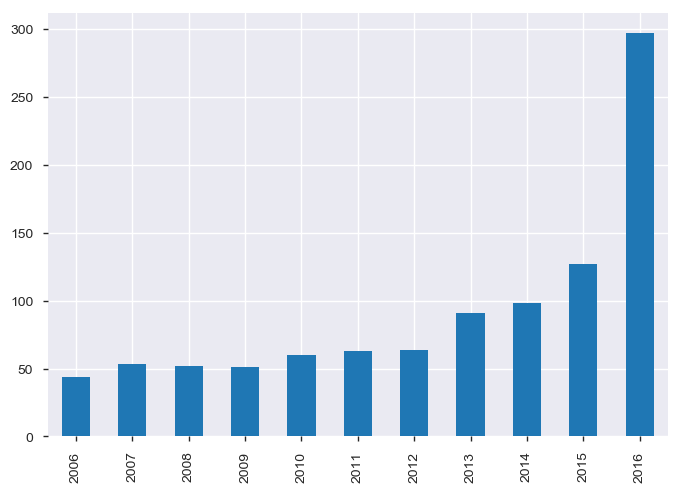

In [0]:
IMDb_List_New['Year'].value_counts().sort_index().plot.bar()

-   It is observed that __53%__ of the movies in __top 1000 list are in range of 2013 to 2016__

### 4.2 Movies count based on Genre <a id="section402"></a>

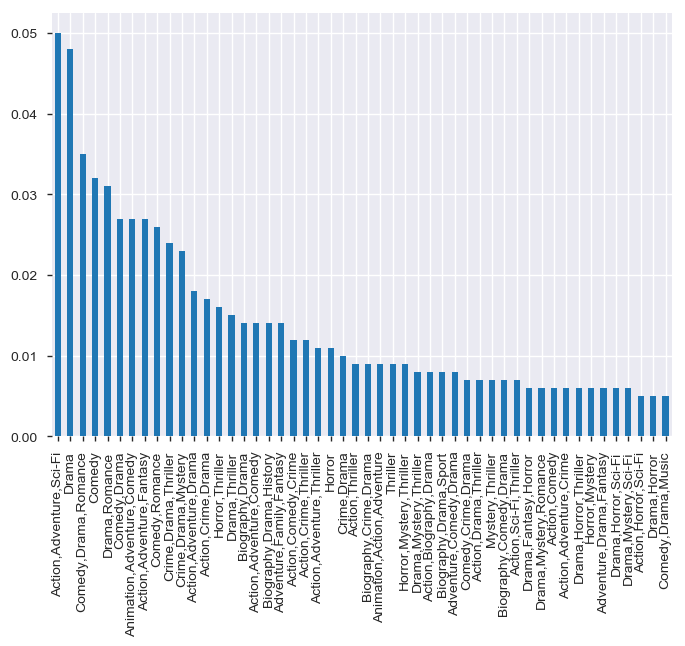

In [0]:
import matplotlib.pyplot as plt
Bar_plot = (IMDb_List_New['Genre'].value_counts().head(50)/ len(IMDb_List_New)).plot.bar()
Bar_plot

-  From the above plot it is observed the most of the movies which ranked top 1000 in IMDB list are of genre __Action, Adventure and Sci-Fi__ followed by Drama

### 4.3 Count of top 5 movies based on Genre <a id="section403"></a>

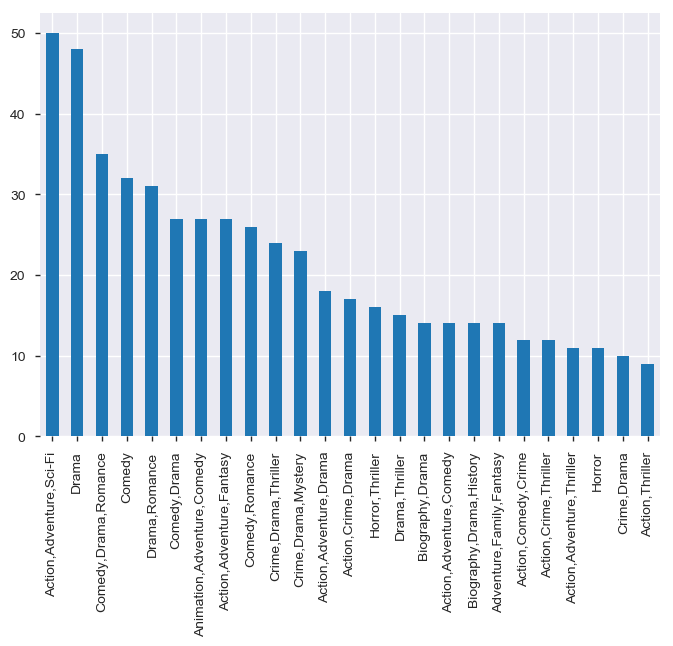

In [0]:
v = IMDb_List_New['Genre'].value_counts()[IMDb_List_New['Genre'].value_counts() == IMDb_List_New['Genre'].value_counts()].head(25)
v.plot.bar()

Top 25 categories of Genre can be found out using the above histogram

- As we have __genre's of combined type__ it is __difficult to categorize__ on basis of one particular genre.

__As our data contains more number of unique categorical data there are high chances of cardinality (More than 90 % of distinct values). Therefore, Lets move on to compare and find out the relationship betwee the Numerical variable.__

### 4.4 Finding corelation between the numerical columns <a id="section404"></a>

Text(0.5, 1.0, 'Correlation between features')

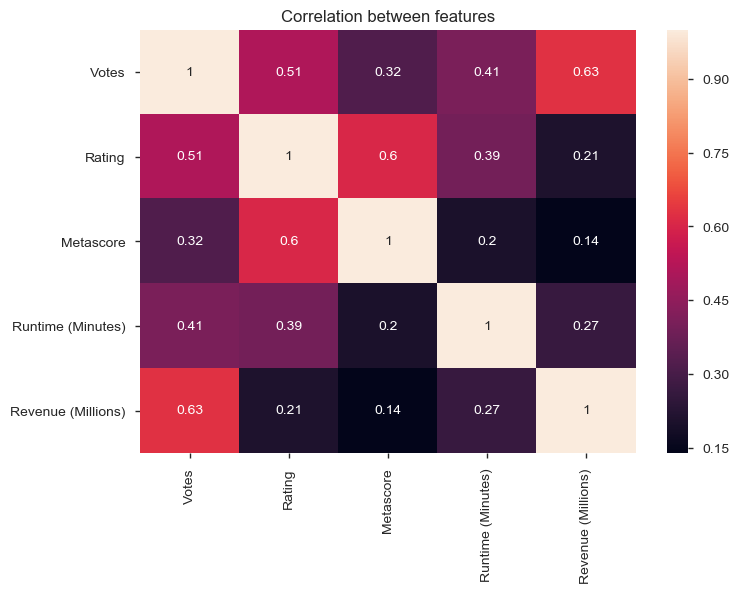

In [0]:
IMDB_Corelation = (IMDb_List_New.loc[:, ['Votes', 'Rating', 'Metascore','Runtime (Minutes)','Revenue (Millions)']]).corr()
sns.heatmap(IMDB_Corelation, annot=True)
plt.title('Correlation between features')

- From the above Heat plot it is observed that
- __Votes, Revenue__, which is 0.63 are __highly corelated__ followed by Votes vs Rating
- __Metascore, Revenue__  have __Weak corelation.__

Lets try to find out the relationship between the highly positive related variables like __Votes Vs Revenue__, __Votes Vs Rating__ etc

### 4.5 Relationship between votes and Revenue <a id="section405"></a>

In [0]:
IMDb_List_New.sort_values(['Votes'], ascending=False).head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
54,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
80,81,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0
124,125,The Dark Knight Rises,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,448.13,78.0
36,37,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
76,77,The Avengers,"Action,Sci-Fi",Earth's mightiest heroes must come together an...,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143,8.1,1045588,623.28,69.0


In [0]:
IMDb_List_New.sort_values(['Revenue (Millions)'], ascending=False).head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
50,51,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0
87,88,Avatar,"Action,Adventure,Fantasy",A paraplegic marine dispatched to the moon Pan...,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",2009,162,7.8,935408,760.51,83.0
85,86,Jurassic World,"Action,Adventure,Sci-Fi","A new theme park, built on the original site o...",Colin Trevorrow,"Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...",2015,124,7.0,455169,652.18,59.0
76,77,The Avengers,"Action,Sci-Fi",Earth's mightiest heroes must come together an...,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143,8.1,1045588,623.28,69.0
54,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0


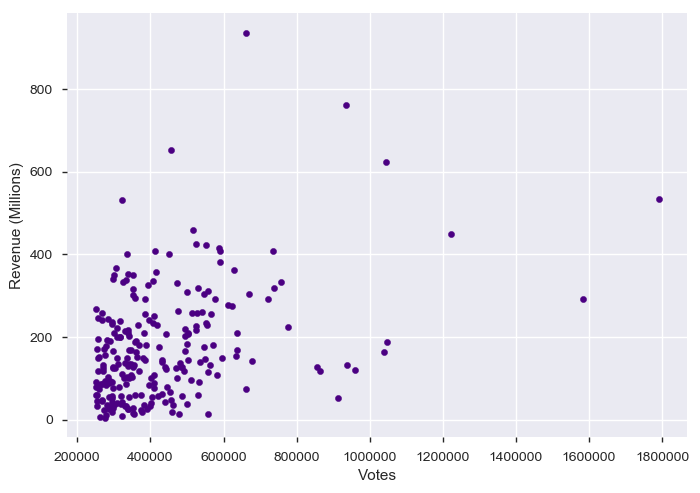

In [0]:
IMDb_List_New[(IMDb_List_New['Votes'] > 250000)].plot.scatter(x='Votes', y='Revenue (Millions)', color='Indigo')

From the above plot it is observed that, 

- __The Dark Knight__ movie has received the __highest votes__of __17,91,916__ but its __revenue is 533.32__.
- __Inception__also follows the same patter as __The Dark Knight__
- Whereas, __Star Wars: Episode VII - The Force Awakens__ have the highest revenue of __936.63 Millions__ but have votes __6,61,608__

#####  Movies based on votes are worth watching than Revenue

### 4.6 Relation between  votes and Rating of top 250 movies <a id="section406"></a>

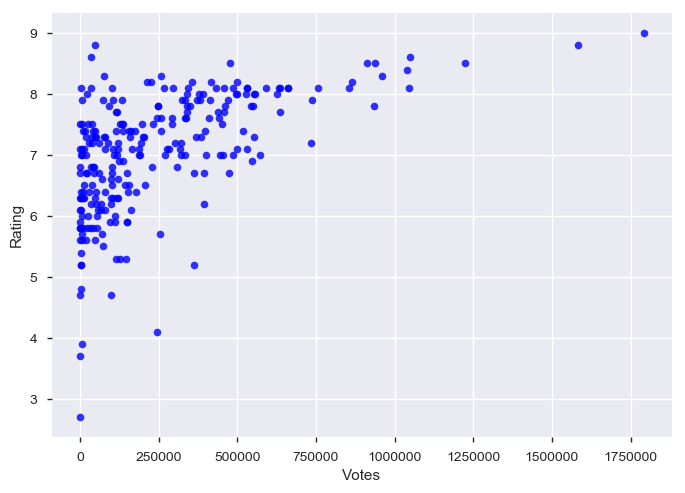

In [0]:
IMDb_Vo_Ra  = IMDb_List_New[IMDb_List_New['Rank'] < 250]
sns.regplot(data=IMDb_Vo_Ra, x="Votes", y="Rating", fit_reg=False, marker="o", color="blue", scatter_kws={'s':30})

- We can see fairly in this plot that as number of __Votes increases the rating increases__

It is clear that user __votes and rating are positively corelated__ to each other

### 4.7 Relation between user votes and Runtime <a id="section407"></a>

In [0]:
IMDb_Vo_Ru =  IMDb_List_New[['Votes', 'Runtime (Minutes)']]
IMDb_Vo_Ru.head()

,Votes,Runtime (Minutes)
0,757074,121
1,485820,124
2,157606,117
3,60545,108
4,393727,123


In [0]:
IMDb_Vo_Ru1 = IMDb_Vo_Rt[(IMDb_Vo_Ru['Votes'] > 0)  & (IMDb_Vo_Ru['Runtime (Minutes)'] <= 120)]
IMDb_Vo_Ru1.shape

(711, 2)

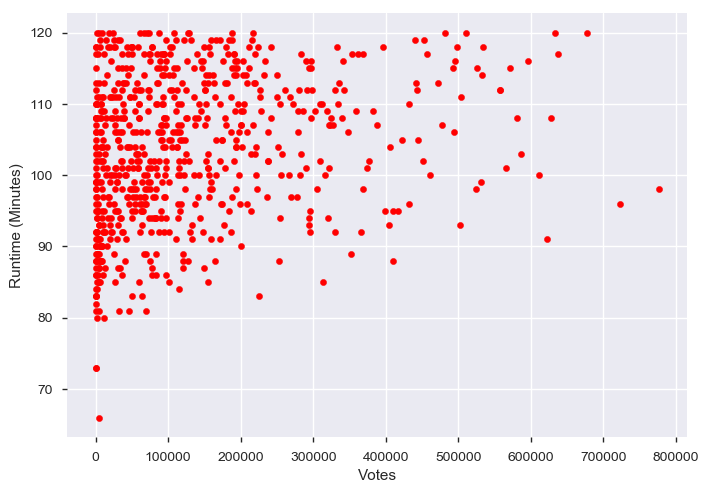

In [0]:
IMDb_Vo_Ru1[IMDb_Vo_Ru1['Votes'] > 0].plot.scatter(x='Votes', y='Runtime (Minutes)', color='Red')

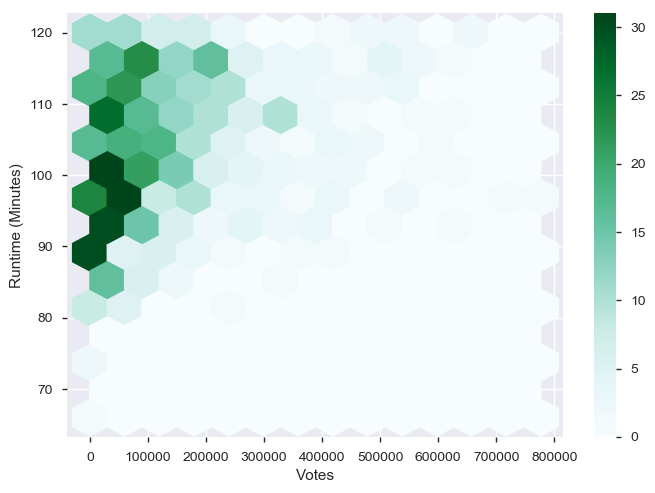

In [0]:
IMDb_Vo_Ru1[IMDb_Vo_Ru1['Runtime (Minutes)'] <= 120].plot.hexbin(x='Votes', y='Runtime (Minutes)', gridsize=13)

From the above scatter and pair plot it is clear that 70% of the data has runtime less than 120 minutes
- From the above findings we can infer that __70% of the IMDb's top 1000 movies have runtime less than or equal to 120 Minutes__

### 4.8 Rating Vs Runtime <a id="section408"></a>

In [0]:
IMDb_Ra_Ru =  IMDb_List_New[['Rating', 'Runtime (Minutes)', 'Rank', 'Votes']]
IMDb_Ra_Ru.head()

,Rating,Runtime (Minutes),Rank,Votes
0,8.1,121,1,757074
1,7.0,124,2,485820
2,7.3,117,3,157606
3,7.2,108,4,60545
4,6.2,123,5,393727


In [0]:
IMDb_Ra_Ru1 = IMDb_Ra_Ru[IMDb_Vo_Ru['Runtime (Minutes)'] <= 120]
IMDb_Ra_Ru1.shape

(711, 4)

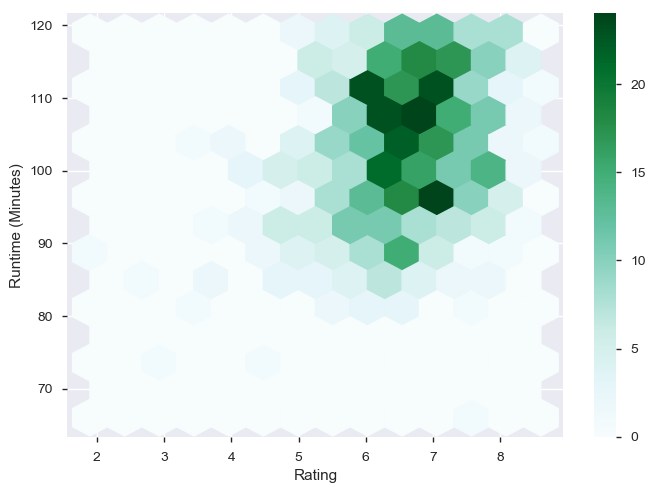

In [0]:
IMDb_Ra_Ru1[IMDb_Ra_Ru1['Runtime (Minutes)'] < 120].plot.hexbin(x='Rating', y='Runtime (Minutes)', gridsize=13)
#IMDb_Ra_Ru1[IMDb_Ra_Ru1['Rating'] < 7].plot.scatter(x='Rating', y='Runtime (Minutes)', color='Red')

Short length movies have higher chance to obtain rating between 6 to 7

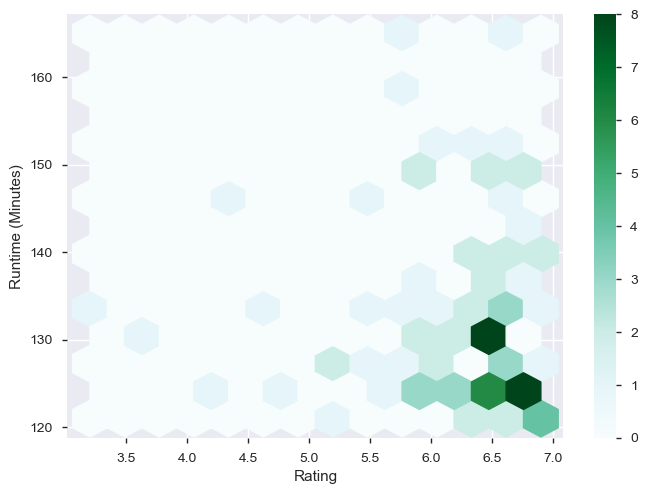

In [0]:
IMDb_Ra_Ru1[IMDb_Ra_Ru1['Runtime (Minutes)'] > 120 & ['Votes'] > 400000 ].plot.hexbin(x='Rating', y='Runtime (Minutes)', gridsize=13)
#IMDb_Ra_Ru1[IMDb_Ra_Ru1['Runtime (Minutes)'] > 120].plot.scatter(x='Runtime (Minutes)', y='Rating', color='Red')

On the other hand, movies which have runtime more than 120 min have likely chance to obtain rating more than 6.5 and above

- From the above comparision between Rating and Runtime, we can infer that __movies which have length of 120 minutes or less have higher chance of getting Rank 7__
- Maximum (70%) of the top 1000 list movies are 2 or less than 2 hour lenght movies

### 4.9 Relationship of Votes w.r.t Rating, Revenue, Runtime and Metascore <a id="section409"></a>

In [0]:
IMDb_Num =  IMDb_List_New[['Votes', 'Rating', 'Runtime (Minutes)', 'Rank', 'Title', 'Revenue (Millions)','Metascore']]
IMDb_Num.head()

,Votes,Rating,Runtime (Minutes),Rank,Title,Revenue (Millions),Metascore
0,757074,8.1,121,1,Guardians of the Galaxy,333.13,76.0
1,485820,7.0,124,2,Prometheus,126.46,65.0
2,157606,7.3,117,3,Split,138.12,62.0
3,60545,7.2,108,4,Sing,270.32,59.0
4,393727,6.2,123,5,Suicide Squad,325.02,40.0


In [0]:
b = IMDb_Num.sort_values(['Votes'], ascending=False).head(10)
b

,Votes,Rating,Runtime (Minutes),Rank,Title,Revenue (Millions),Metascore
54,1791916,9.0,152,55,The Dark Knight,533.32,82.0
80,1583625,8.8,148,81,Inception,292.57,74.0
124,1222645,8.5,164,125,The Dark Knight Rises,448.13,78.0
36,1047747,8.6,169,37,Interstellar,187.99,74.0
76,1045588,8.1,143,77,The Avengers,623.28,69.0
144,1039115,8.4,165,145,Django Unchained,162.80,81.0
77,959065,8.3,153,78,Inglourious Basterds,120.52,69.0
99,937414,8.5,151,100,The Departed,132.37,85.0
87,935408,7.8,162,88,Avatar,760.51,83.0
64,913152,8.5,130,65,The Prestige,53.08,66.0


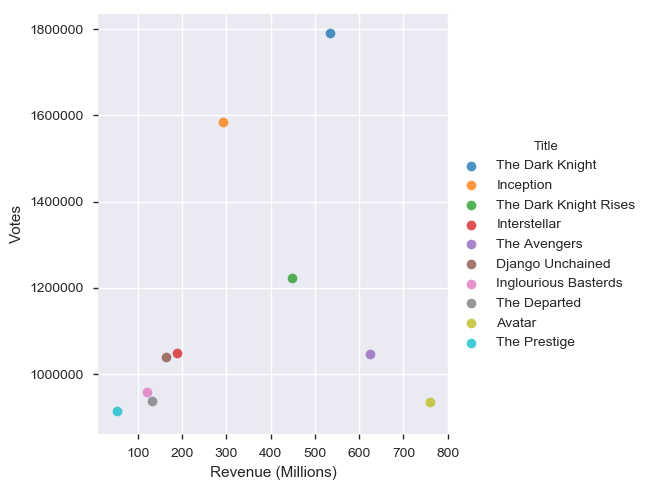

In [0]:
sns.lmplot(x='Revenue (Millions)', y='Votes', hue='Title', 
           data=b, 
           fit_reg=False)

Movies having __less votes has high revenue and vice versa__

- Avatar and The Avengers received low votes, but have received highest revenues of 760 and 620 Millions
- Dark knight received highest votes but its revenue is around 500 millions

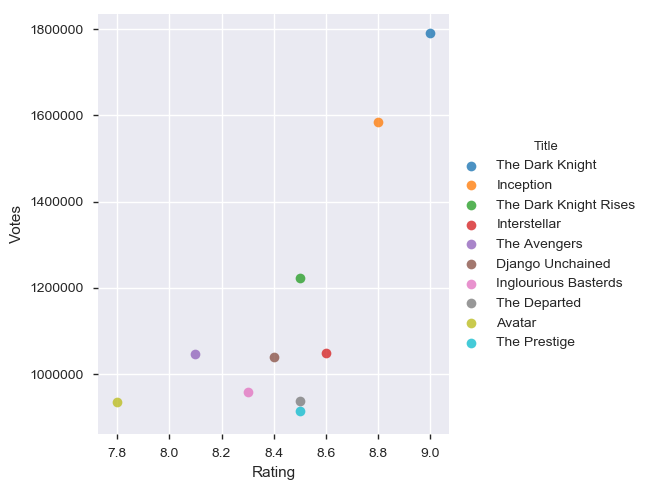

In [0]:
sns.lmplot(x='Rating', y='Votes', hue='Title', 
           data=b, 
           fit_reg=False)

Movies having __high votes greater than 0.7 million__ have __high chance to rate more than 8__

- The Dark knight with highest votes received highest rating of 9.0

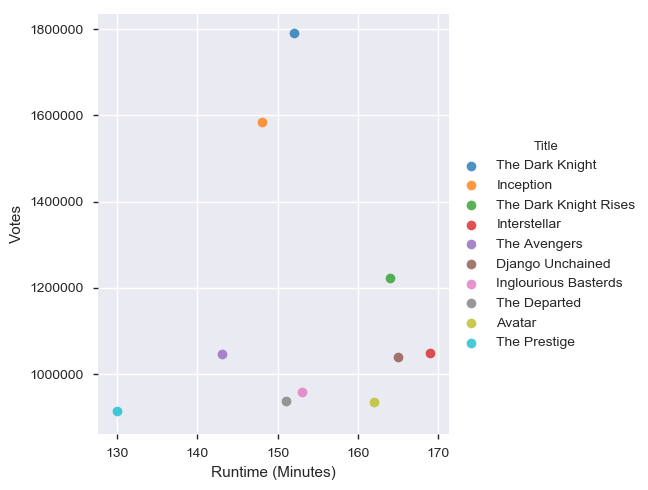

In [0]:
sns.lmplot(x='Runtime (Minutes)', y='Votes', hue='Title', 
           data=b, 
           fit_reg=False)

Movies which have __runtime greater than 100 minutes__ and __votes greater than 0.7 Million__ have an __average rating of 8.2__

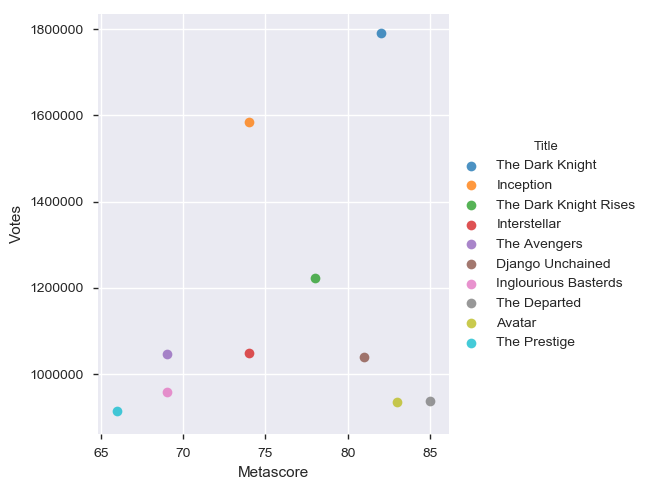

In [0]:
sns.lmplot(x='Metascore', y='Votes', hue='Title', 
           data=b, 
           fit_reg=False)

Movies having __high Metascore__ have likely to get __less votes__

### 4.10 Relationship between Metascore and Rating <a id="section410"></a>

In [0]:
c = IMDb_List_New[IMDb_List_New['Metascore'] > 90]
c.shape

(19, 12)

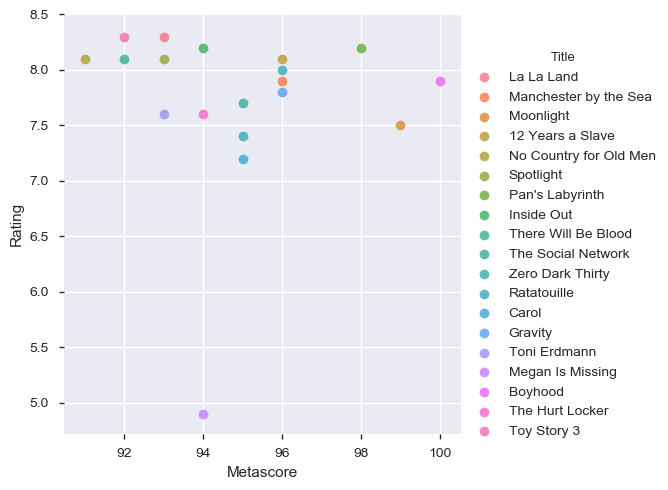

In [0]:
sns.lmplot(x='Metascore', y='Rating', hue='Title', 
           data=c, 
           fit_reg=False)


Movies with __Metascore greter than 90__ have __average rating of 7.7__

### 4.11 Hypothesis: On what parameters a movie has to be selected in IMDB top list ? <a id="section411"></a>

From __4.6 , 4.7 , 4.8__ we figured out that

- __Movies should not be picked on basis on Revenue they generate, Rather votes can be taken into consideration__.
- __Majority population of the movies which received votes below 0.4 Million are of short length__.
- __Movies which have run time greater than 120 min and votes greater than 0.4 million have an average rating of 7.7__

From __4.9__, The top 10 movies based on votes and their relationship with Revenue, Rating, Runtime and Metascore
- Avatar and The Avengers received low votes, but have received highest revenues of 760 and 620 Millions where as Dark knight received highest votes but its revenue is around 500 millions
- Movies which have more than 0.7 million users have an average of 8.2 Rating
- Runtime greater than 100 minutes and votes greater than 0.7 Million have an average rating of 8.2
- Movies having high Metascore have more chnace to get less votes
- Movies with Metascore greter than 90 have an average rating of 7.7

## 5. Conclusion  <a id="section5"></a>

- With the help of this notebook we learnt how exploratory data analysis can be carried out using Pandas plotting.
- Also we have seen making use of packages like __matplotlib and seaborn__ to develop better insights about the data.<br/>
- We have also seen how __preproceesing__ helps in dealing with _missing_ values and irregualities present in the data.
- We also make use of __pandas profiling__ feature to generate an html report containing all the information of the various features present in the dataset.
- We have seen the impact of columns like Votes, Rating, Revenue and Runtime and Metascore and how are  they related to each other.
- The most important inference drawn from all this analysis is, we get to know what are the __features on which Movies are corelted with respect to Votes, Rating, Revenue and Runtime.__ 
- This analysis will help us to choose which __machine learning model__ we can apply to predict survival of test dataset. 